<h1>Shapiro-Wilk Test</h1>

<h3><font color='grey'>Detects significant deviations from normality</font></h3>

<br>

<ul>
    <li><code>Hypothesis (H<sub>&alpha;</sub>)</code> - "This data <u>is not</u> normally distributed."</li>
    <br>
    <li><code>Null Hypothesis (H<sub>0</sub>)</code> - "This data <u>is</u> normally distributed."</li>
    <br>
    <li><code>&alpha;</code> - Statistical significance, e.g. &alpha; = 5%, sig = 95%.</li>
    <br>
    <li><code>p-value</code> - Determines if H<sub>0</sub> if rejected or not:</li>
    <ul>
        <li><code>p &#60; &alpha;</code> - e.g. 2%, enough confidence to reject H<sub>0</sub>, therefore H<sub>&alpha;</sub> is accepted (data is not normal).</li>
        <li><code>p &ge; &alpha;</code> - e.g. 8%, insufficient confidence to reject H<sub>0</sub>, therefore H<sub>&alpha;</sub> is rejcted (data is normal).</li>
    </ul>
</ul>

In [3]:
# libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# style
from ipynb.fs.full.i_Style_Sheet import *
plt.style.use(style_use)
plt.rcParams.update(style_params)

# import ColorSpace function
from ipynb.fs.full.ii_ColorSpace import colorspace
hex_base = '89F4EC'
palettes = colorspace(hex_base)
pal = palettes['Friend palette']

# base data
file_path = r'Data\gss_general_social_survey.hdf5'
data = pd.read_hdf(file_path)
data = data['educ'].dropna()
mu, sigma, s = data.mean(), data.std(), 1000

# sampling
np.random.seed(10)
data = np.random.normal(mu, sigma, s)

# shapiro
from scipy.stats import shapiro, probplot
stat, p = shapiro(data)
a = 0.05
if p>a:
    nml = 'Normal'
else:
    nml = 'Not Normal'
print(f'P-value = {round(p*100, 1)}% ({nml})')

P-value = 69.5% (Normal)


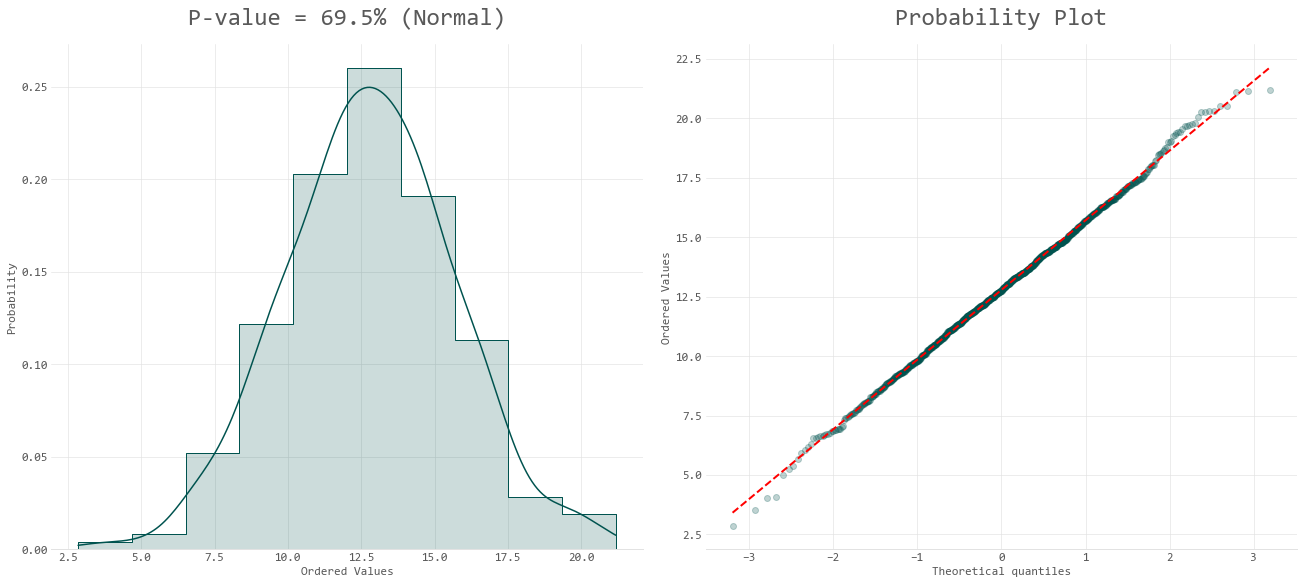

In [10]:
# shapiro wilk test analysis
def swt(data, a, ttl, n_bins, c):
    
    # shapiro
    from scipy.stats import shapiro, probplot
    stat, p = shapiro(data)
    
    # normality
    if p>a:
        nml = 'Normal'
    else:
        nml = 'Not Normal'
    
    # viz
    fig, [ax_1, ax_2] = plt.subplots(1, 2, figsize=(18,8), constrained_layout=True)
    plt.suptitle(ttl)
    
    # hist
    sns.histplot(ax=ax_1, data=data, stat='probability',
                 element='step', kde=True, bins=n_bins, alpha=0.2,
                 color=c)
    # qq 
    probplot(data, dist='norm', plot=ax_2)
    
    # format
    ax_1.set_title(f'P-value = {round(p*100, 1)}% ({nml})')
    ax_1.set_xlabel(ax_2.get_ylabel())
    ax_2.get_lines()[1].set_linewidth(2)
    ax_2.get_lines()[1].set_linestyle('--')
    ax_2.get_lines()[0].set_color(c)
    ax_2.get_lines()[0].set_alpha(0.25)
    
    # return
    return plt.show()

# base data
file_path = r'Data\gss_general_social_survey.hdf5'
data = pd.read_hdf(file_path)
data = data['educ'].dropna()
mu, sigma, s = data.mean(), data.std(), 1000

# sampling
np.random.seed(10)
data = np.random.normal(mu, sigma, s)

# variables
a = 0.05
ttl = 'Normality Checks'
n_bins = 10
c = pal[1]

# swt
swt(data, a, ttl, n_bins, c)